In [ ]:
from matplotlib.backends.backend_pdf import PdfPages
import sys
import numpy as np
import matplotlib.pyplot as plt


from colibri.constants import LHAPDF_XGRID
import lhapdf
import itertools

# Set the path to the style file
plt.style.use("../colibristyle_colorblind.mplstyle")
sys.path.insert(0, "./")
from distance_def import *




### Generalisation test

In [2]:
flavour = {
    1: "d",
    -1: r"$\bar{d}$",
    2: "u",
    -2: r"$\bar{u}$",
    3: "s",
    -3: r"$\bar{s}$",
    4: "c",
    -4: r"$\bar{c}$",
    5: "b",
    -5: "bbar",
    6: "t",
    21: "g"
}

# Set Q scale
Q = 1.65

flavours = [1, -1, 2, -2, 3, -3, 4, 21]

In [3]:
PDF_sets = {
    "CT18NNLO": 58,
    "NNPDF40_nnlo_as_01180": 100,
    "MSHT20nnlo_as118": 64,
}

pdfs_target = {}

x_grid = LHAPDF_XGRID[36:-20] # points that are >= 1e-5 <= 0.83

for PDF_set, nreps in PDF_sets.items():
    pdfs_target[PDF_set] = []

    for i in range(nreps):
        pdfs_target[PDF_set].append(lhapdf.mkPDF(PDF_set, i+1))

LHAPDF 6.5.4 loading /Users/markcostantini/arm64_miniconda3/envs/wmin-model-dev/share/LHAPDF/CT18NNLO/CT18NNLO_0001.dat
CT18NNLO PDF set, member #1, version 1; LHAPDF ID = 14001
LHAPDF 6.5.4 loading /Users/markcostantini/arm64_miniconda3/envs/wmin-model-dev/share/LHAPDF/CT18NNLO/CT18NNLO_0002.dat
CT18NNLO PDF set, member #2, version 1; LHAPDF ID = 14002
LHAPDF 6.5.4 loading /Users/markcostantini/arm64_miniconda3/envs/wmin-model-dev/share/LHAPDF/CT18NNLO/CT18NNLO_0003.dat
CT18NNLO PDF set, member #3, version 1; LHAPDF ID = 14003
LHAPDF 6.5.4 loading /Users/markcostantini/arm64_miniconda3/envs/wmin-model-dev/share/LHAPDF/CT18NNLO/CT18NNLO_0004.dat
CT18NNLO PDF set, member #4, version 1; LHAPDF ID = 14004
LHAPDF 6.5.4 loading /Users/markcostantini/arm64_miniconda3/envs/wmin-model-dev/share/LHAPDF/CT18NNLO/CT18NNLO_0005.dat
CT18NNLO PDF set, member #5, version 1; LHAPDF ID = 14005
LHAPDF 6.5.4 loading /Users/markcostantini/arm64_miniconda3/envs/wmin-model-dev/share/LHAPDF/CT18NNLO/CT18NNLO

In [4]:
basis_dim = 99
pdf_basis = "250503_pod_basis_40k"

wmin_tot_basis = []
center_pdf = lhapdf.mkPDF(pdf_basis, 0)
center_pdf_grid = pdf_grid_allflav(center_pdf, flavours, x_grid, Q)

for i in range(basis_dim):
    wmin_tot_basis.append(lhapdf.mkPDF(pdf_basis, i+1))

LHAPDF 6.5.4 loading /Users/markcostantini/arm64_miniconda3/envs/wmin-model-dev/share/LHAPDF/250503_pod_basis_40k/250503_pod_basis_40k_0000.dat
250503_pod_basis_40k PDF set, member #0, version 1
LHAPDF 6.5.4 loading /Users/markcostantini/arm64_miniconda3/envs/wmin-model-dev/share/LHAPDF/250503_pod_basis_40k/250503_pod_basis_40k_0001.dat
250503_pod_basis_40k PDF set, member #1, version 1; LHAPDF ID = 1
LHAPDF 6.5.4 loading /Users/markcostantini/arm64_miniconda3/envs/wmin-model-dev/share/LHAPDF/250503_pod_basis_40k/250503_pod_basis_40k_0002.dat
250503_pod_basis_40k PDF set, member #2, version 1; LHAPDF ID = 2
LHAPDF 6.5.4 loading /Users/markcostantini/arm64_miniconda3/envs/wmin-model-dev/share/LHAPDF/250503_pod_basis_40k/250503_pod_basis_40k_0003.dat
250503_pod_basis_40k PDF set, member #3, version 1; LHAPDF ID = 3
LHAPDF 6.5.4 loading /Users/markcostantini/arm64_miniconda3/envs/wmin-model-dev/share/LHAPDF/250503_pod_basis_40k/250503_pod_basis_40k_0004.dat
250503_pod_basis_40k PDF set, m

In [5]:
distances = {}
summed_distances = {}
mean_squared_error = {}
median_squared_error = {}

basis_dims = [30, 40, 50, 60, 70, 80, 90]

for pdf_target_name, pdf_target_replicas in pdfs_target.items():
    
    distances[pdf_target_name] = []
    summed_distances[pdf_target_name] = []
    mean_squared_error[pdf_target_name] = []
    median_squared_error[pdf_target_name] = []

    for basis_dim in basis_dims:
        wmin_basis = wmin_tot_basis[:basis_dim]
        
        distance = []

        for pdf_target_replica in pdf_target_replicas:
            original, reco, w, d = wmin_distance(pdf_target_replica, center_pdf_grid, wmin_basis, flavours, x_grid, Q, dist_type=0)
            distance.append(d)

        distances[pdf_target_name].append((basis_dim, distance))
        summed_distances[pdf_target_name].append(np.sum(distance))
        mean_squared_error[pdf_target_name].append(np.mean(distance))
        median_squared_error[pdf_target_name].append(np.median(distance))

        

In [7]:
conversion_names = {"CT18NNLO": "CT18",
                    "NNPDF40_nnlo_as_01180": "NNPDF40",
                    "MSHT20nnlo_as118": "MSHT20"}

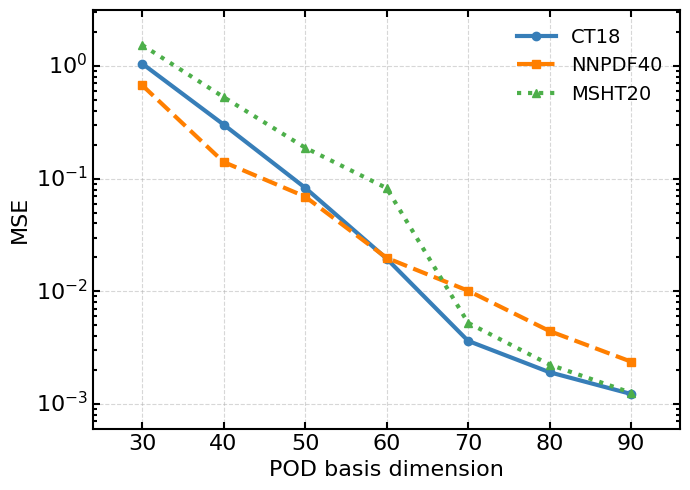

In [ ]:
fig, ax = plt.subplots(figsize=(7, 5))

line_styles = ['-', '--', ':', '-.']
markers = ['o', 's', '^', 'D', 'v', '*']
style_cycler = itertools.cycle(zip(line_styles, markers))

for pdf_target_name, pdf_target_replicas in pdfs_target.items():
    line_style, marker = next(style_cycler)
    ax.plot(
        basis_dims, 
        mean_squared_error[pdf_target_name], 
        linestyle=line_style, 
        marker=marker, 
        label=f"{conversion_names[pdf_target_name]}", 
        linewidth=3.
    )

# for pdf_target_name, pdf_target_replicas in pdfs_target.items():
#     ax.plot(basis_dims, mean_squared_error[pdf_target_name], "-o", label=f"{conversion_names[pdf_target_name]}", linewidth=2.5)

# Labels and legend 
ax.set_xlabel("POD basis dimension", fontsize=16)
ax.set_ylabel("MSE", fontsize=16)
ax.legend(frameon=False, fontsize=14)

# Improve grid visibility
ax.grid(True, linestyle="--", alpha=0.5)
ax.set_yscale("log")

# Adjust layout and save
plt.tight_layout()
fig.savefig("mse_log_generalisation.pdf")
plt.show()


# Plot PDFs

In [13]:
member_idx = 0
original_msht, reco_msht, w, d = wmin_distance(
    pdfs_target["MSHT20nnlo_as118"][member_idx], center_pdf_grid, wmin_tot_basis[:80], flavours, x_grid, Q, dist_type=0
)

original_ct, reco_ct, w, d = wmin_distance(
    pdfs_target["CT18NNLO"][member_idx], center_pdf_grid, wmin_tot_basis[:80], flavours, x_grid, Q, dist_type=0
)

EPSILON = 1e-4

with PdfPages("plots_PDF_msht_80w.pdf") as pdf:
    for i in range(len(flavours)):

        fig, [axup, axdown] = plt.subplots(
            2, 1, sharex=True, figsize=(7, 7), gridspec_kw={"height_ratios": [3, 1], "hspace": 0.05}
        )
        
        # Upper plot: original vs reco PDF
        axup.plot(x_grid, original_msht[i], label=f"MSHT20 member {member_idx}", linewidth=4)
        axup.plot(x_grid, reco_msht[i], label="MSHT20 POD reconstructed", linewidth=3, linestyle="dashed")

        axup.plot(x_grid, original_ct[i], label=f"CT18 member {member_idx}", linewidth=4)
        axup.plot(x_grid, reco_ct[i], label="CT18 POD reconstructed", linewidth=3, linestyle="dashed")

        # Lower plot: Ratio plot
        axdown.plot([], [])
        axdown.plot(x_grid, reco_msht[i] / (original_msht[i]+EPSILON), linewidth=3)
        axdown.plot([], [])
        axdown.plot(x_grid, reco_ct[i] / (original_ct[i]+EPSILON), linewidth=3)

        axdown.axhline(1.0, color="gray", linestyle="--", linewidth=1.5, alpha=0.7)  # Reference line
        axdown.set_ylim(0.9, 1.1)  # Adjust for better readability
        axdown.set_xlabel("x", fontsize=16)
        axdown.set_ylabel("Ratio", fontsize=16)

        # Formatting upper plot
        axup.set_title(f"{flavour[flavours[i]]}(x) PDF", fontsize=16)
        axup.set_xscale("log")
        axup.set_ylabel(r"$x f(x)$", fontsize=16)
        axup.legend(frameon=False, fontsize=14)

        # Improve grid visibility
        axup.grid(True, linestyle="--", alpha=0.5)
        axdown.grid(True, linestyle="--", alpha=0.5)

        # Save and close
        pdf.savefig(bbox_inches="tight")
        plt.close()
